## Pre-Processing

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("application_train_merged.csv")
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,BUREAU_LOAN_COUNT,PREVIOUS_LOAN_COUNT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,1.0,0.0,0.0,1.0,0.0,1.0,4.0,2.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [4]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
BUREAU_LOAN_COUNT             44020
PREVIOUS_LOAN_COUNT           16454
Length: 124, dtype: int64

In [ ]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)

pd.options.display.max_rows = None
print(missing_values)


COMMONAREA_MEDI                 214865
COMMONAREA_MODE                 214865
COMMONAREA_AVG                  214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MODE                204488
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_AVG                    182590
LANDAREA_MODE                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_MODE               179943
BASEMENTAREA_AVG                179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_MEDI       

In [6]:
threshold = 50000
df_new = df.dropna(thresh=len(df) - threshold, axis=1)

print(df_new.shape)

(307511, 73)


In [7]:
df_new = df_new.dropna()

print(df_new.shape)

(247686, 73)


In [8]:
print(df_new.info())


<class 'pandas.core.frame.DataFrame'>
Index: 247686 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   247686 non-null  int64  
 1   TARGET                       247686 non-null  int64  
 2   NAME_CONTRACT_TYPE           247686 non-null  object 
 3   CODE_GENDER                  247686 non-null  object 
 4   FLAG_OWN_CAR                 247686 non-null  object 
 5   FLAG_OWN_REALTY              247686 non-null  object 
 6   CNT_CHILDREN                 247686 non-null  int64  
 7   AMT_INCOME_TOTAL             247686 non-null  float64
 8   AMT_CREDIT                   247686 non-null  float64
 9   AMT_ANNUITY                  247686 non-null  float64
 10  AMT_GOODS_PRICE              247686 non-null  float64
 11  NAME_TYPE_SUITE              247686 non-null  object 
 12  NAME_INCOME_TYPE             247686 non-null  object 
 13  NAME

## Business Exploratory Data Analysis

#### Distribusi Skor Risiko Kredit (EXT_SOURCE_2) dan Hubungannya dengan TARGET

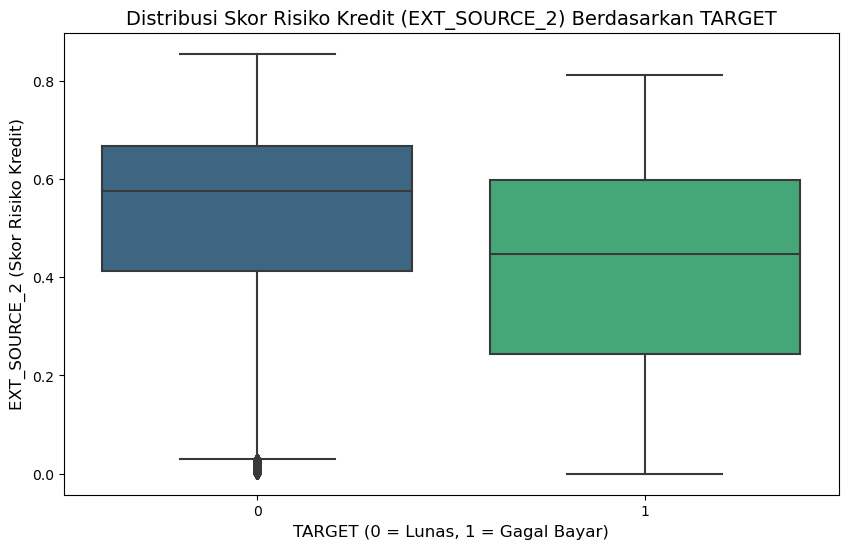

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.boxplot(x=df_new["TARGET"], y=df_new["EXT_SOURCE_2"], palette="viridis")

plt.title("Distribusi Skor Risiko Kredit (EXT_SOURCE_2) Berdasarkan TARGET", fontsize=14)
plt.xlabel("TARGET (0 = Lunas, 1 = Gagal Bayar)", fontsize=12)
plt.ylabel("EXT_SOURCE_2 (Skor Risiko Kredit)", fontsize=12)

plt.show()

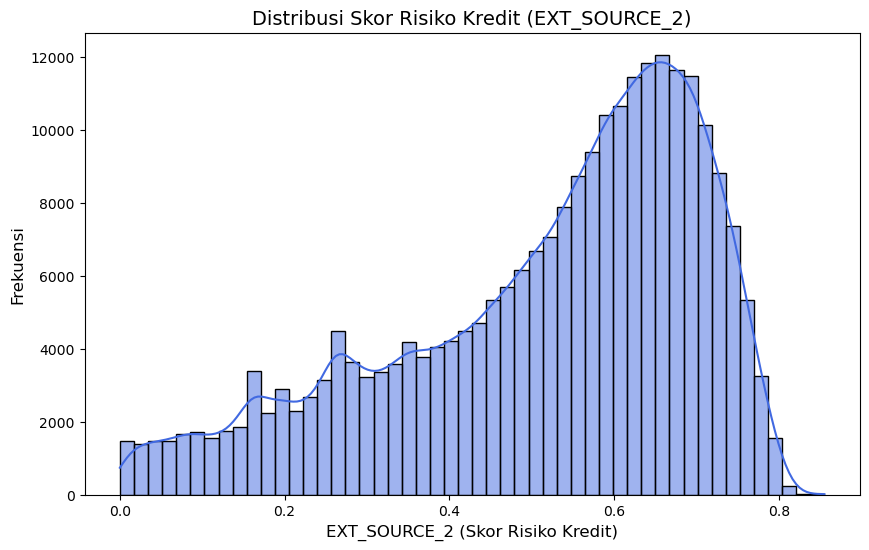

In [10]:
plt.figure(figsize=(10, 6))

sns.histplot(df_new["EXT_SOURCE_2"], bins=50, kde=True, color="royalblue")

plt.title("Distribusi Skor Risiko Kredit (EXT_SOURCE_2)", fontsize=14)
plt.xlabel("EXT_SOURCE_2 (Skor Risiko Kredit)", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)

plt.show()

### Jumlah Pinjaman Sebelumnya vs. Probabilitas Gagal Bayar

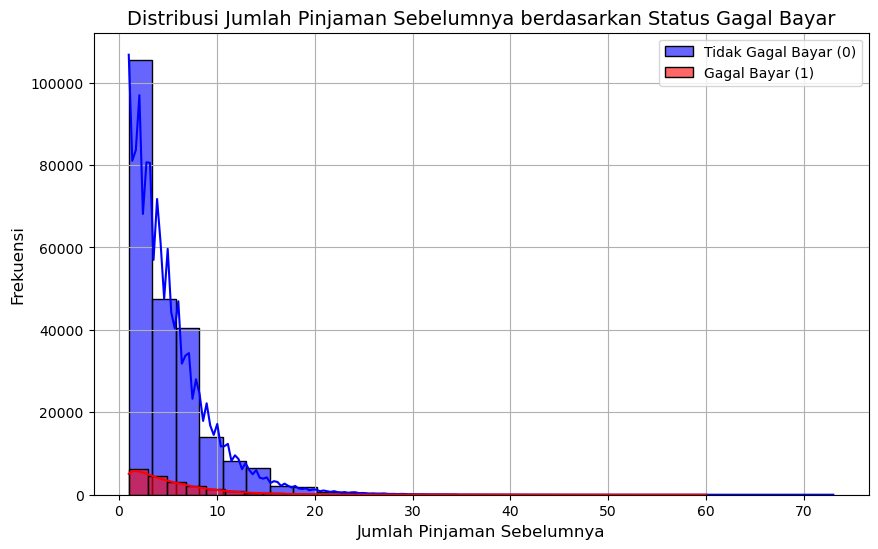

In [11]:
plt.figure(figsize=(10, 6))

sns.histplot(df_new[df_new["TARGET"] == 0]["PREVIOUS_LOAN_COUNT"], bins=30, color='blue', label="Tidak Gagal Bayar (0)", kde=True, alpha=0.6)
sns.histplot(df_new[df_new["TARGET"] == 1]["PREVIOUS_LOAN_COUNT"], bins=30, color='red', label="Gagal Bayar (1)", kde=True, alpha=0.6)

plt.title("Distribusi Jumlah Pinjaman Sebelumnya berdasarkan Status Gagal Bayar", fontsize=14)
plt.xlabel("Jumlah Pinjaman Sebelumnya", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.legend()
plt.grid(True)

plt.show()

### Perbandingan Tingkat Kredit Berdasarkan Jenis Kontrak (NAME_CONTRACT_TYPE)

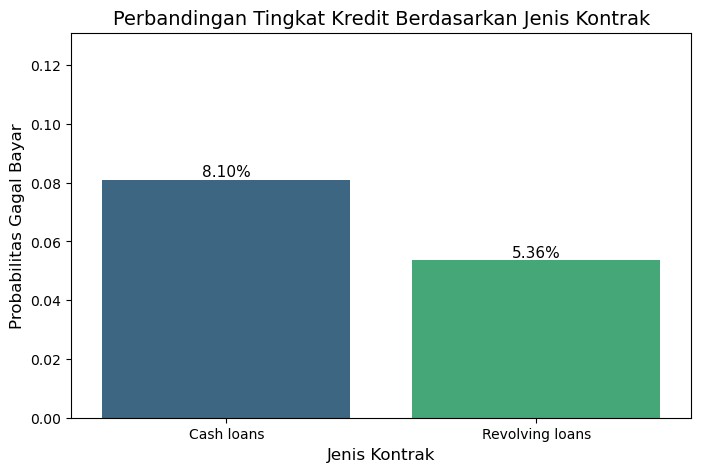

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set ukuran plot
plt.figure(figsize=(8, 5))

# Hitung probabilitas gagal bayar untuk setiap jenis kontrak
contract_default_rate = df_new.groupby("NAME_CONTRACT_TYPE")["TARGET"].mean().reset_index()

# Bar plot dengan annotasi
ax = sns.barplot(x="NAME_CONTRACT_TYPE", y="TARGET", data=contract_default_rate, palette="viridis")

# Tambahkan nilai di atas bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black')

# Menambahkan judul dan label
plt.title("Perbandingan Tingkat Kredit Berdasarkan Jenis Kontrak", fontsize=14)
plt.xlabel("Jenis Kontrak", fontsize=12)
plt.ylabel("Probabilitas Gagal Bayar", fontsize=12)
plt.ylim(0, contract_default_rate["TARGET"].max() + 0.05)  # Atur batas Y agar lebih rapi

# Menampilkan plot
plt.show()


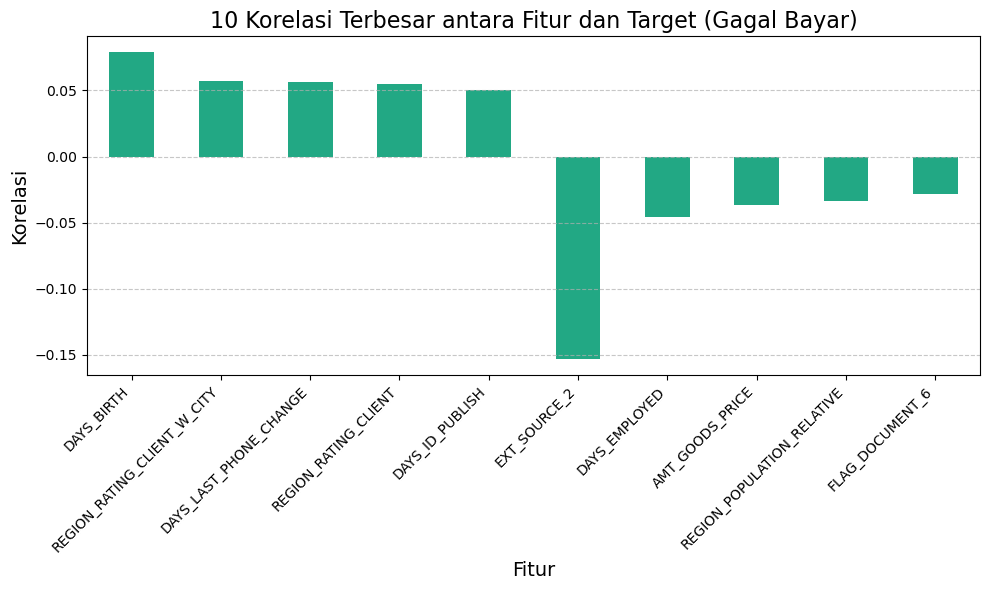

In [13]:
from matplotlib import cm

numerical_features = df_new.select_dtypes(include=['float64', 'int64']).columns.drop('TARGET')

correlations = df_new[numerical_features].corrwith(df_new["TARGET"])

top_positives = correlations.nlargest(5)
top_negatives = correlations.nsmallest(5)

top_correlations = pd.concat([top_positives, top_negatives])

plt.figure(figsize=(10, 6))
top_correlations.plot(kind='bar', color=cm.viridis(0.6))

plt.title('10 Korelasi Terbesar antara Fitur dan Target (Gagal Bayar)', fontsize=16)
plt.xlabel('Fitur', fontsize=14)
plt.ylabel('Korelasi', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


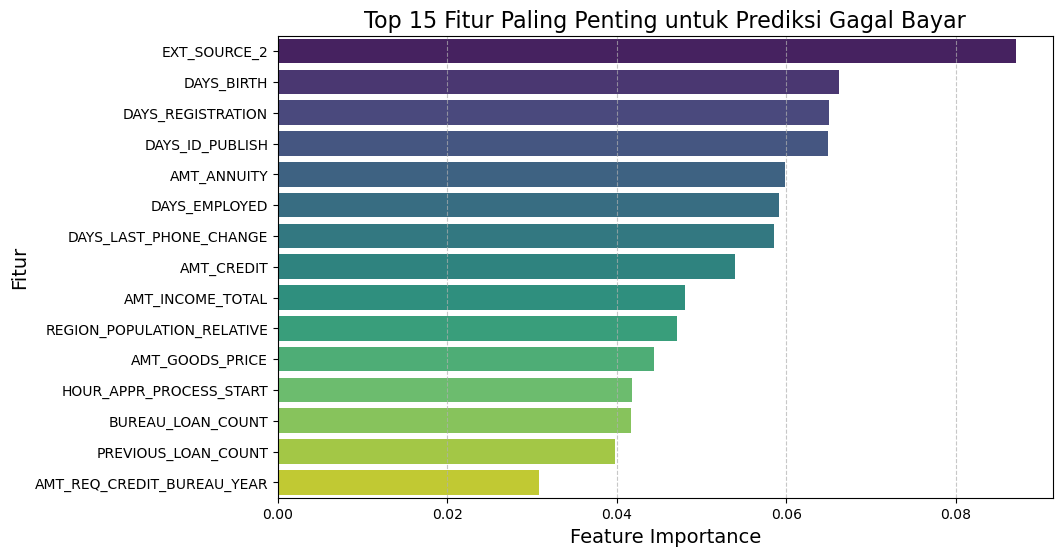

Jumlah fitur yang dipilih: 18
Fitur yang dipilih: ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'BUREAU_LOAN_COUNT', 'PREVIOUS_LOAN_COUNT']


c:\Users\Rasen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

X = df_new.select_dtypes(include=['float64', 'int64']).drop(columns=['TARGET', 'SK_ID_CURR'])  # Hanya fitur numerik
y = df_new['TARGET']

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X, y)

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[:15], y=feature_importances.index[:15], palette='viridis')

plt.title('Top 15 Fitur Paling Penting untuk Prediksi Gagal Bayar', fontsize=16)
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Fitur', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

selector = SelectFromModel(rf, prefit=True)
X_selected = selector.transform(X)

print(f"Jumlah fitur yang dipilih: {X_selected.shape[1]}")
print("Fitur yang dipilih:", list(X.columns[selector.get_support()]))


In [15]:
selected_features = list(X.columns[selector.get_support()])
print("Fitur yang dipilih:\n")
for feature in selected_features:
    print(feature)

Fitur yang dipilih:

AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
CNT_FAM_MEMBERS
HOUR_APPR_PROCESS_START
EXT_SOURCE_2
OBS_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
AMT_REQ_CREDIT_BUREAU_YEAR
BUREAU_LOAN_COUNT
PREVIOUS_LOAN_COUNT


In [16]:
# Menentukan fitur yang dipilih
selected_features = [
    "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
    "REGION_POPULATION_RELATIVE", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION",
    "DAYS_ID_PUBLISH", "CNT_FAM_MEMBERS", "HOUR_APPR_PROCESS_START", "EXT_SOURCE_2",
    "OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DAYS_LAST_PHONE_CHANGE",
    "AMT_REQ_CREDIT_BUREAU_YEAR", "BUREAU_LOAN_COUNT", "PREVIOUS_LOAN_COUNT"
]

# Membuat variabel X dan y
X = df_new[selected_features]
y = df_new["TARGET"]

# Menampilkan bentuk data
print("Shape X:", X.shape)
print("Shape y:", y.shape)

Shape X: (247686, 18)
Shape y: (247686,)


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247686 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_INCOME_TOTAL            247686 non-null  float64
 1   AMT_CREDIT                  247686 non-null  float64
 2   AMT_ANNUITY                 247686 non-null  float64
 3   AMT_GOODS_PRICE             247686 non-null  float64
 4   REGION_POPULATION_RELATIVE  247686 non-null  float64
 5   DAYS_BIRTH                  247686 non-null  int64  
 6   DAYS_EMPLOYED               247686 non-null  int64  
 7   DAYS_REGISTRATION           247686 non-null  float64
 8   DAYS_ID_PUBLISH             247686 non-null  int64  
 9   CNT_FAM_MEMBERS             247686 non-null  float64
 10  HOUR_APPR_PROCESS_START     247686 non-null  int64  
 11  EXT_SOURCE_2                247686 non-null  float64
 12  OBS_30_CNT_SOCIAL_CIRCLE    247686 non-null  float64
 13  OBS_60_CNT_SOCIAL_C

In [18]:
for col in X.select_dtypes(include=['int64']).columns:
    print(f"{col}: {X[col].nunique()} unique values")

DAYS_BIRTH: 17378 unique values
DAYS_EMPLOYED: 12240 unique values
DAYS_ID_PUBLISH: 6145 unique values
HOUR_APPR_PROCESS_START: 24 unique values


In [19]:
X['HOUR_APPR_PROCESS_START'].unique()

array([10, 11,  9, 16, 14, 15,  7, 13,  6, 12,  8, 19,  3, 17, 18, 21,  4,
        5, 20, 22,  1,  2, 23,  0], dtype=int64)

In [20]:
X = pd.get_dummies(X, columns=['HOUR_APPR_PROCESS_START'], prefix='HOUR', drop_first=True)

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247686 entries, 0 to 307510
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_INCOME_TOTAL            247686 non-null  float64
 1   AMT_CREDIT                  247686 non-null  float64
 2   AMT_ANNUITY                 247686 non-null  float64
 3   AMT_GOODS_PRICE             247686 non-null  float64
 4   REGION_POPULATION_RELATIVE  247686 non-null  float64
 5   DAYS_BIRTH                  247686 non-null  int64  
 6   DAYS_EMPLOYED               247686 non-null  int64  
 7   DAYS_REGISTRATION           247686 non-null  float64
 8   DAYS_ID_PUBLISH             247686 non-null  int64  
 9   CNT_FAM_MEMBERS             247686 non-null  float64
 10  EXT_SOURCE_2                247686 non-null  float64
 11  OBS_30_CNT_SOCIAL_CIRCLE    247686 non-null  float64
 12  OBS_60_CNT_SOCIAL_CIRCLE    247686 non-null  float64
 13  DAYS_LAST_PHONE_CHA

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

logreg = LogisticRegression(max_iter=500, class_weight="balanced")
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

print(classification_report(y_test, y_pred_logreg))


              precision    recall  f1-score   support

           0       0.94      0.61      0.74     45645
           1       0.11      0.56      0.18      3893

    accuracy                           0.61     49538
   macro avg       0.53      0.59      0.46     49538
weighted avg       0.88      0.61      0.70     49538



c:\Users\Rasen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

logreg = LogisticRegression(max_iter=500, class_weight="balanced")

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
logreg_scores = cross_val_score(logreg, X, y, cv=kf, scoring='accuracy')

print("Logistic Regression Mean Accuracy:", logreg_scores.mean())
print("All Logistic Regression Scores:", logreg_scores)


c:\Users\Rasen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Rasen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression Mean Accuracy: 0.6055489454293547
All Logistic Regression Scores: [0.60945133 0.60786887 0.61089691 0.59601914 0.60350849]


c:\Users\Rasen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
#pip install imbalanced-learn

In [26]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight="balanced")

rf_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='accuracy')

print("Random Forest Mean Accuracy:", rf_scores.mean())
print("All Random Forest Scores:", rf_scores)

Random Forest Mean Accuracy: 0.9213843336781335
All Random Forest Scores: [0.92131293 0.92139209 0.9213719  0.92143246 0.92141228]


In [ ]:
#pip install --upgrade scikit-learn

In [27]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Inisialisasi model LGBM
lgbm_model = LGBMClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight="balanced")

# K-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lgbm_scores = cross_val_score(lgbm_model, X, y, cv=kf, scoring='accuracy')

# Print hasil cross-validation
print("LightGBM Mean Accuracy:", lgbm_scores.mean())
print("All LightGBM Scores:", lgbm_scores)

[LightGBM] [Info] Number of positive: 15572, number of negative: 182576
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2765
[LightGBM] [Info] Number of data points in the train set: 198148, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 15573, number of negative: 182576
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2765
[LightGBM] [Info] Number of data points in the train set: 198149, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.00000

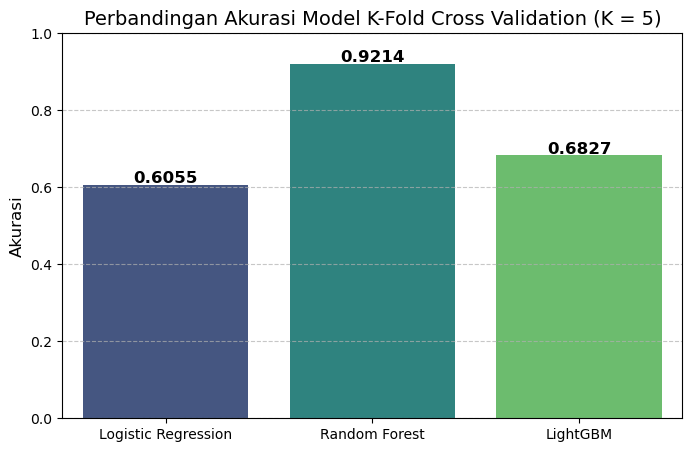

In [34]:
# Simpan hasil skor rata-rata dari masing-masing model
model_scores = {
    "Logistic Regression": logreg_scores.mean(),
    "Random Forest": rf_scores.mean(),
    "LightGBM": lgbm_scores.mean()
}

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()), palette="viridis")

# Tambahkan teks pada setiap bar
for i, v in enumerate(model_scores.values()):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=12, fontweight='bold')

# Format plot
plt.title("Perbandingan Akurasi Model K-Fold Cross Validation (K = 5)", fontsize=14)
plt.ylabel("Akurasi", fontsize=12)
plt.ylim(0, 1)  # Akurasi dalam skala 0 - 1
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()

c:\Users\Rasen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 15573, number of negative: 182575
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010606 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2768
[LightGBM] [Info] Number of data points in the train set: 198148, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


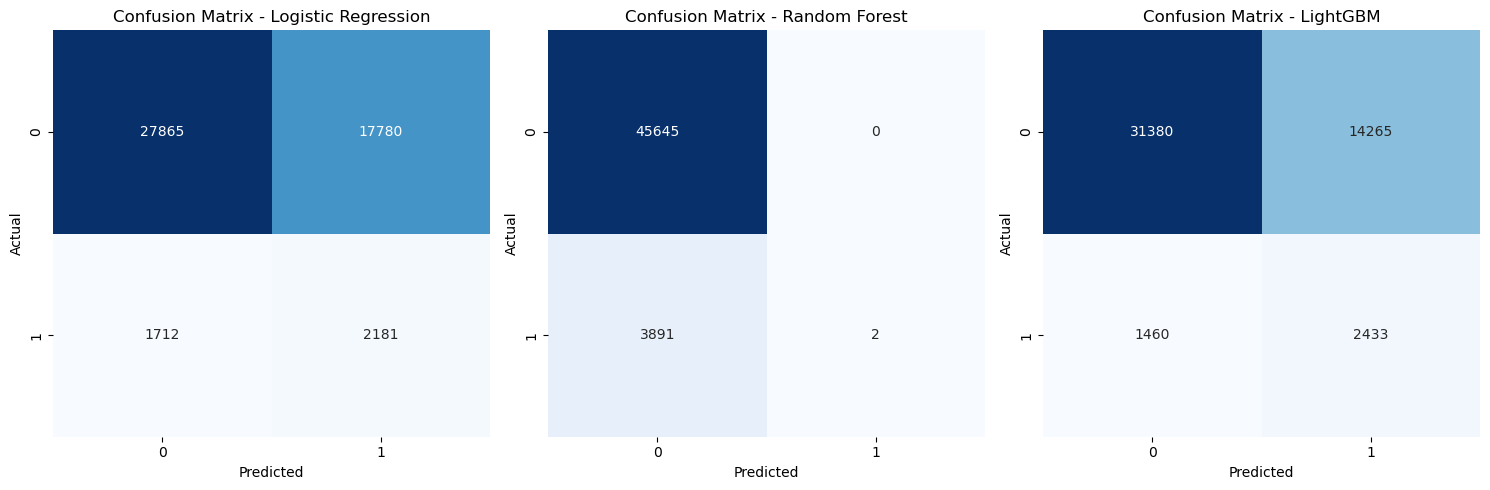

In [29]:
from sklearn.metrics import confusion_matrix

# Inisialisasi model
models = {
    "Logistic Regression": logreg,
    "Random Forest": rf_model,
    "LightGBM": lgbm_model
}

# Membuat confusion matrix untuk setiap model
plt.figure(figsize=(15, 5))

for i, (name, model) in enumerate(models.items(), 1):
    # Prediksi menggunakan model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Buat confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

c:\Users\Rasen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 15573, number of negative: 182575
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2768
[LightGBM] [Info] Number of data points in the train set: 198148, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


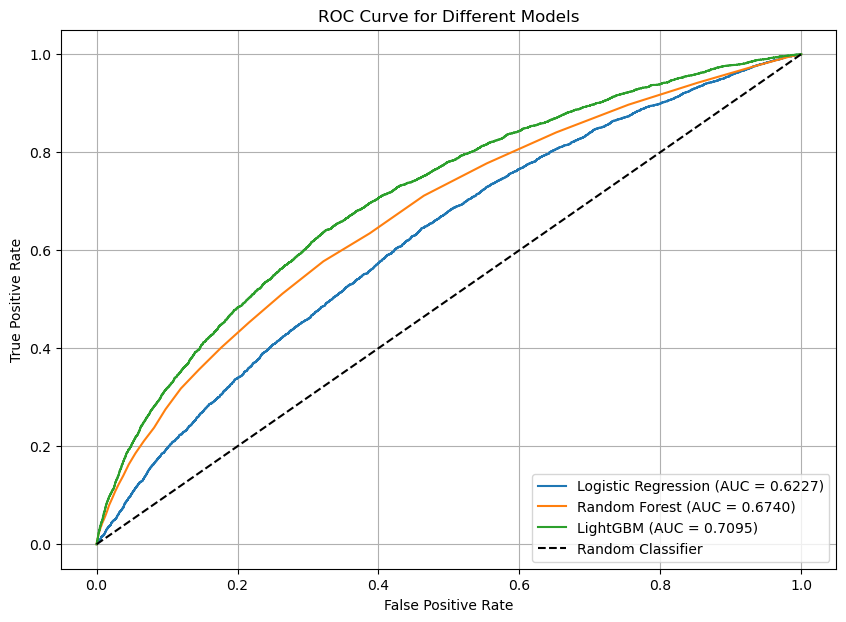

In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Inisialisasi model
models = {
    "Logistic Regression": logreg,
    "Random Forest": rf_model,
    "LightGBM": lgbm_model
}

plt.figure(figsize=(10, 7))

# Loop untuk setiap model
for name, model in models.items():
    # Fit model & Prediksi probabilitas
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]  # Ambil probabilitas kelas positif (1)

    # Hitung FPR, TPR, dan AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

# Plot diagonal garis referensi (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Formatting plot
plt.title("ROC Curve for Different Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()

# Tampilkan plot
plt.show()